Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?


1. Lift is a measure used in association rule mining to quantify the strength of a relationship between two items
in a dataset. It is calculated as the ratio of the observed support of the itemset to the expected support if the 
items were independent of each other. Lift values greater than 1 indicate that the items are positively correlated,
suggesting that the occurrence of one item increases the likelihood of the occurrence of another item. Lift values 
close to 1 indicate that the items are independent, while values less than 1 indicate negative correlation. Lift is
important in association rules because it helps identify meaningful and actionable patterns in the data by 
distinguishing between spurious and significant associations.

2. Support measures the frequency of occurrence of a particular itemset in the dataset. It is calculated as the 
proportion of transactions that contain the itemset. Support indicates how frequently an itemset appears in the
dataset and is used to identify the most frequent itemsets. Confidence measures the strength of association between
two items in terms of how often the presence of one item (antecedent) implies the presence of another item (consequent).
It is calculated as the proportion of transactions that contain both the antecedent and consequent divided by the
proportion of transactions that contain the antecedent. Higher confidence values indicate stronger associations 
between items. Support and confidence are calculated using the following formulas:


3. Association rules mining has several limitations and challenges. One limitation is that it can generate a large 
number of rules, many of which may be spurious or irrelevant. Another challenge is the need to set appropriate 
thresholds for support, confidence, and other parameters, which can be subjective and may affect the quality of 
the discovered rules. Association rules also assume independence between items, which may not always hold true 
in real-world datasets. Moreover, association rule mining may not capture complex relationships or dependencies 
between items, especially when dealing with high-dimensional data. Additionally, association rules may suffer
from the "curse of dimensionality" when applied to datasets with a large number of items or transactions, leading 
to computational challenges and increased computational complexity.

In [1]:
#Importing requirred libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing data as dataframe
orgnl_df = pd.read_csv('wine.csv')
orgnl_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# checking unique value counts of Type column
orgnl_df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
# Consdiering all columns except Type for PCA
df = orgnl_df.iloc[:,1:]
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Checking shape of the data
df.shape

(178, 13)

In [7]:
# checking basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
# here is the desriptive statistics with all the information of the data
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# checking null values present in the dataset
df.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
# checking if any row is duplicated
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [11]:
# checking if any column is duplicated
df.T.duplicated()

Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

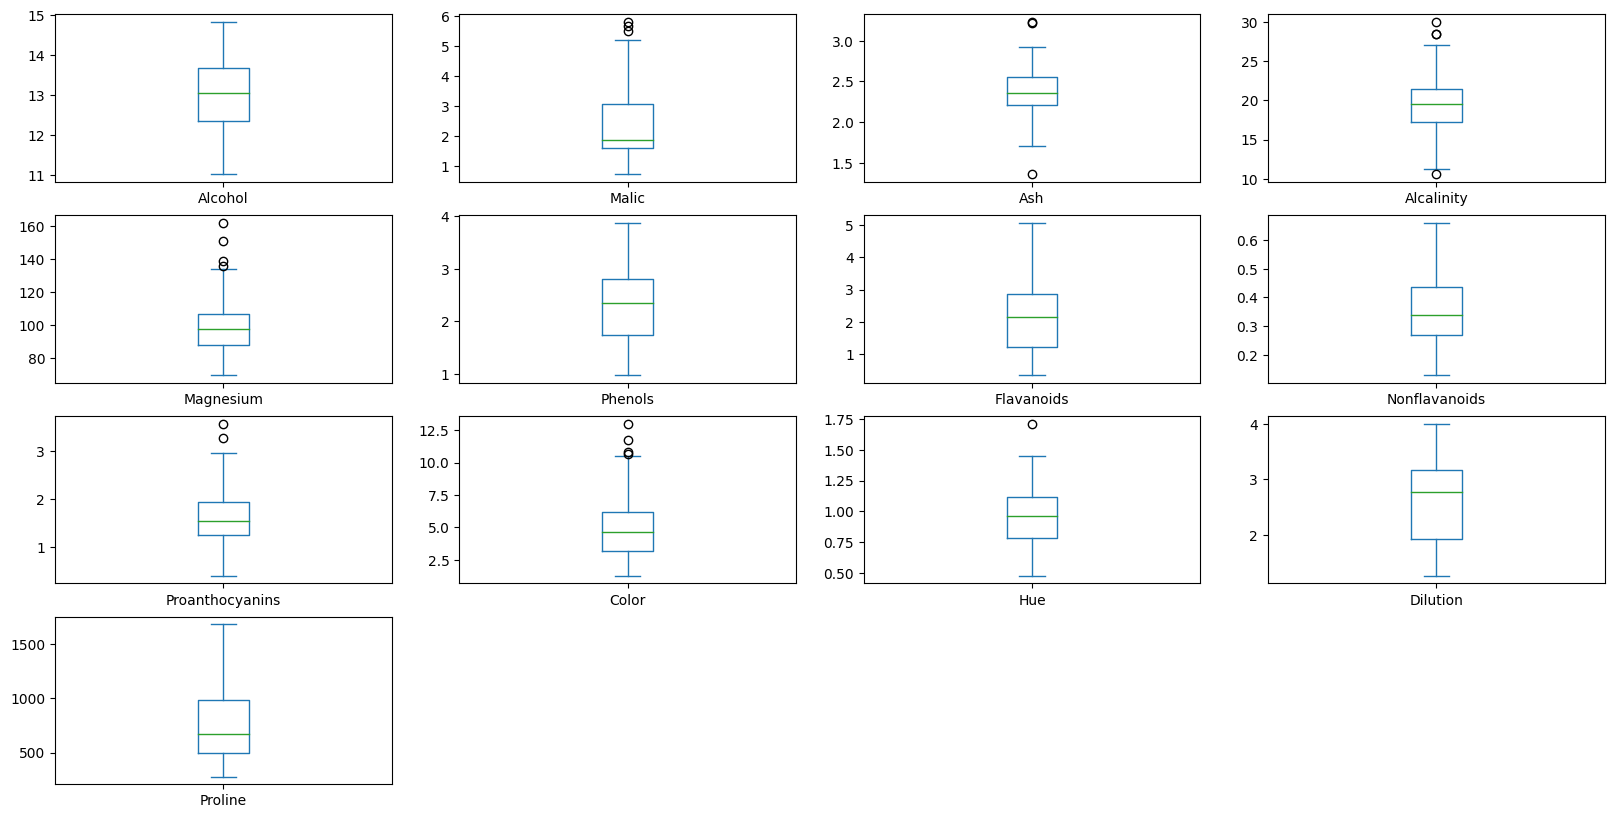

In [12]:
#Boxplot to check outliers and see the distribution of the data
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,10))
plt.show()

    As we can see Malic, Ash, Alcalinity, Magnesium, Proanthocyanins, Color and Hue containing some outliers and rest are outliers free.
    Further distribution of the data we can see from below density,histogram and scatterplot.

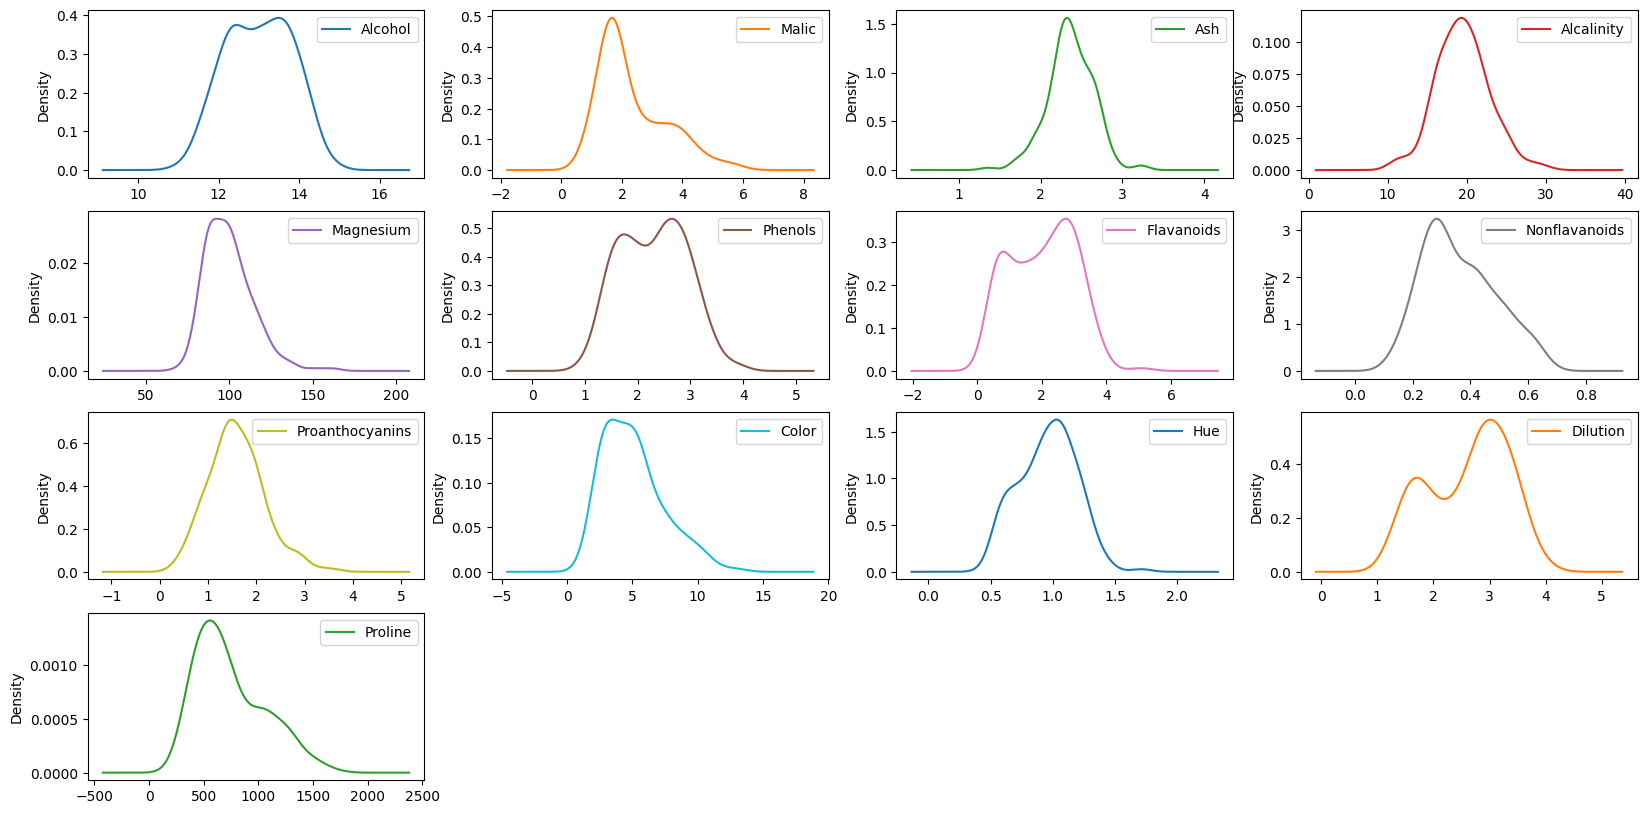

In [13]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False, figsize=(20,10))
plt.show()

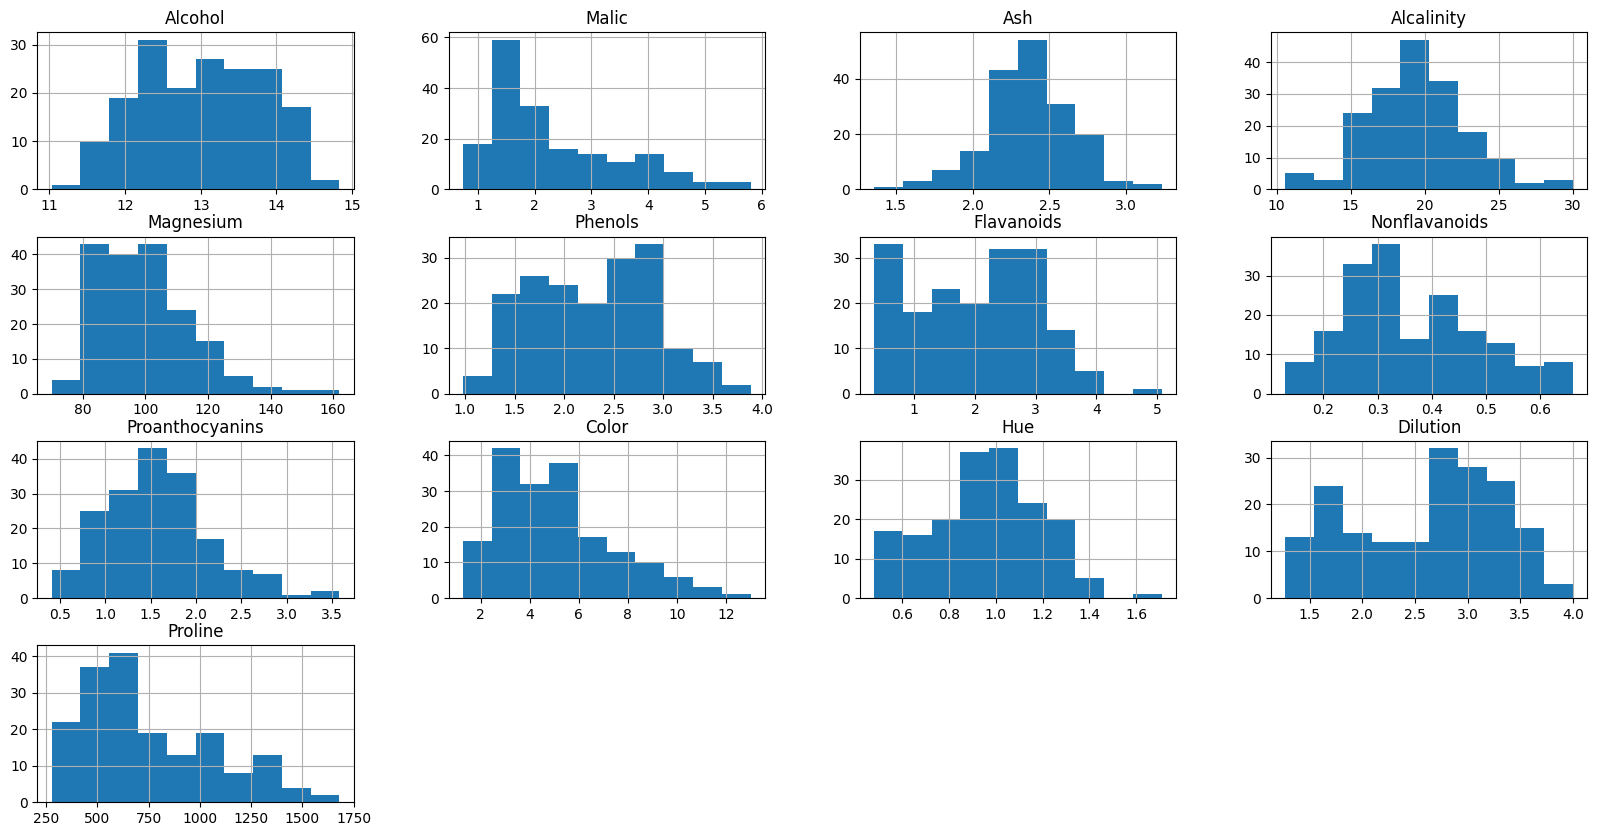

In [14]:
df.hist(figsize=(20,10))
plt.show()

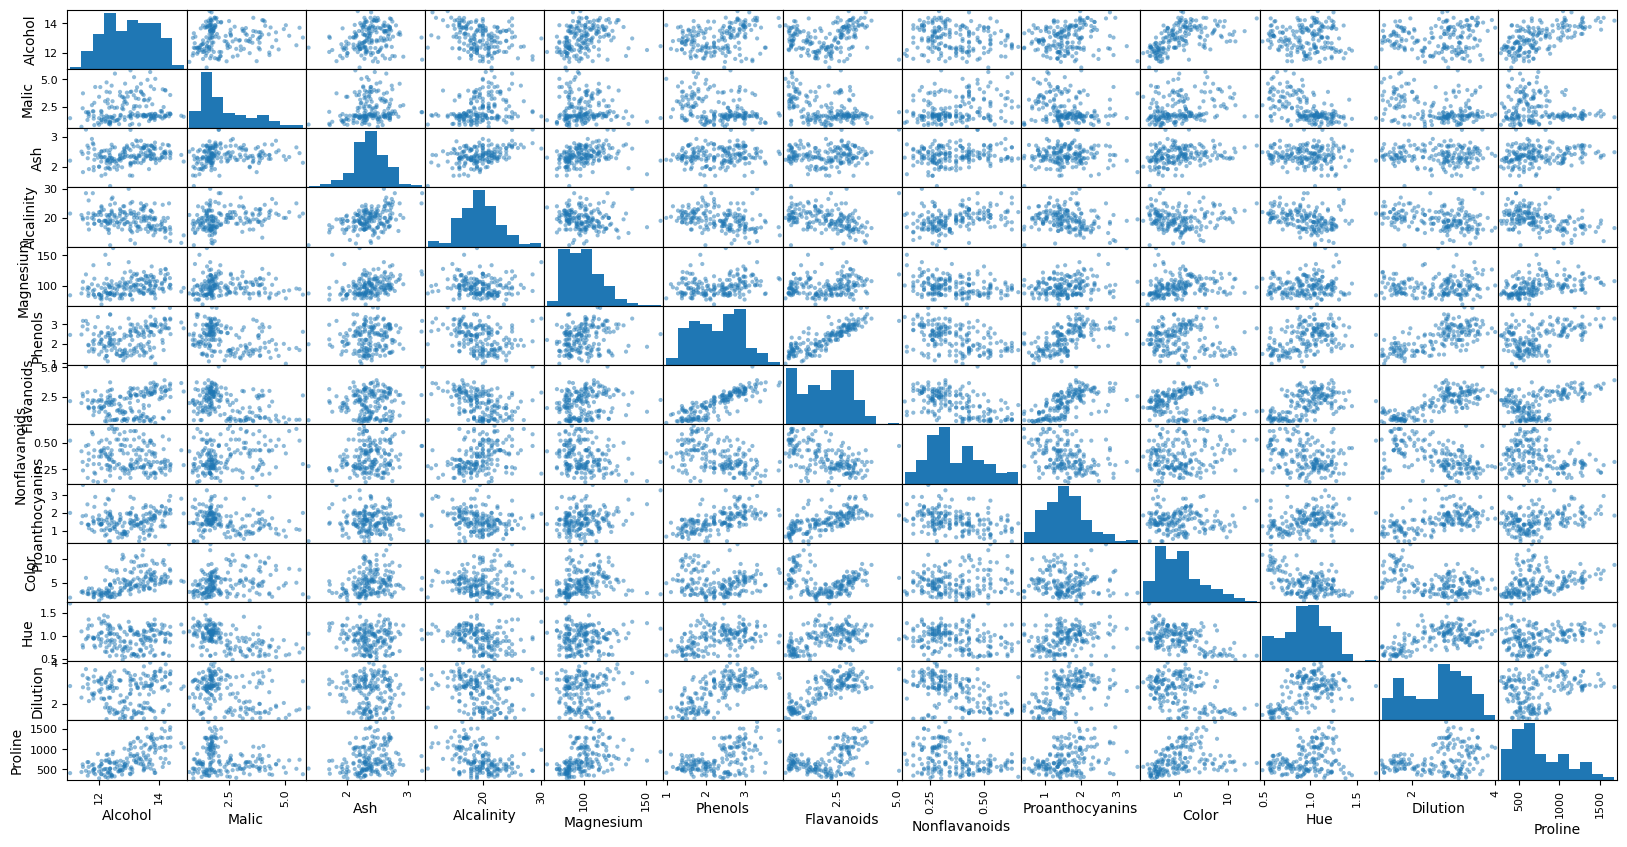

In [15]:
scatter_matrix(df,figsize=(20,10))
plt.show()

In [16]:
#creatig object of StandardScaler for scaling the data or Standardizing the data.
sc = StandardScaler()
stan_df = sc.fit_transform(df)

In [17]:
#scaled data
cols = df.columns
df_stan = pd.DataFrame(stan_df,columns=cols)
df_stan.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [18]:
# here fitting PCA with no parameters to check optimal number of components
pca = PCA()
pca_vals = pca.fit_transform(df_stan)
pca_vals

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
# creating dataframe of principal components
pca_components = pd.DataFrame(pca_vals)
pca_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [20]:
# The amount of variance each PCA explains
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0.5, 1.0, 'Scree plot')

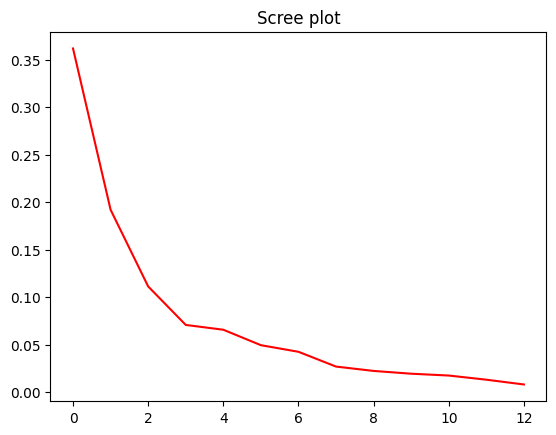

In [21]:
# Scree plot
plt.plot(var,color='red')
plt.title('Scree plot')

In [22]:
# Cumulative Variance

var = np.cumsum(np.round(var,decimals=4)*100)
var

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

    As said in the scenario to take first 3 principal components only, while taking first 3 only we are losing the information
    almost 35% of the information we are losing, ideally if it is 95% plus then it is considered good.

In [23]:
# training PCA with 3 components
pca = PCA(n_components=3)
pca_vals = pca.fit_transform(df_stan)

In [24]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [25]:
var = np.cumsum(np.round(var,decimals=4)*100)
var

array([36.2 , 55.41, 66.53])

    With 3 components 66.53% of variance only explained, rest of the information we are losing.

In [26]:
# extracted 3 PCA components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [27]:
#Creating dataframe of extracted principal components and concatenating with Type column of actual dataframe
fdf = pd.concat([pd.DataFrame(pca_vals[:,0:3],columns=['pc1','pc2','pc3']), orgnl_df[['Type']]], axis = 1)
fdf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<Axes: xlabel='pc1', ylabel='pc2'>

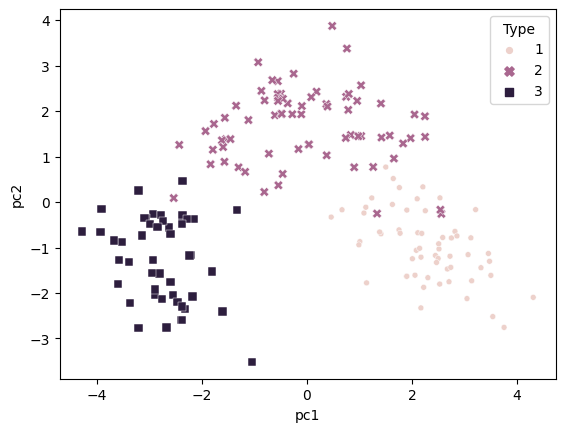

In [28]:
sns.scatterplot(data=fdf,x='pc1',y='pc2',hue='Type',style='Type',size='Type')

<Axes: xlabel='pc1', ylabel='pc3'>

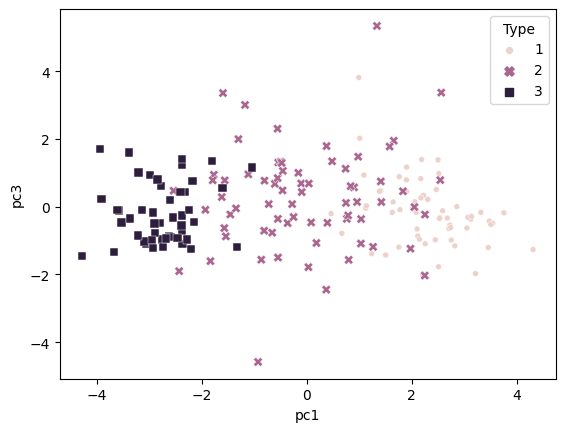

In [29]:
sns.scatterplot(data=fdf,x='pc1',y='pc3',hue='Type',style='Type',size='Type')

<Axes: xlabel='pc2', ylabel='pc3'>

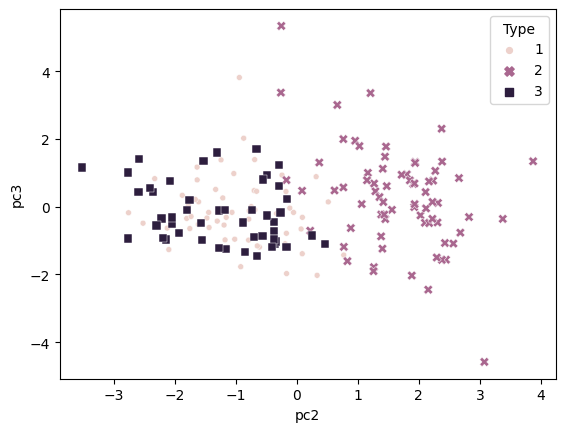

In [30]:
sns.scatterplot(data=fdf,x='pc2',y='pc3',hue='Type',style='Type',size='Type')

##### Hierarchical Clustering

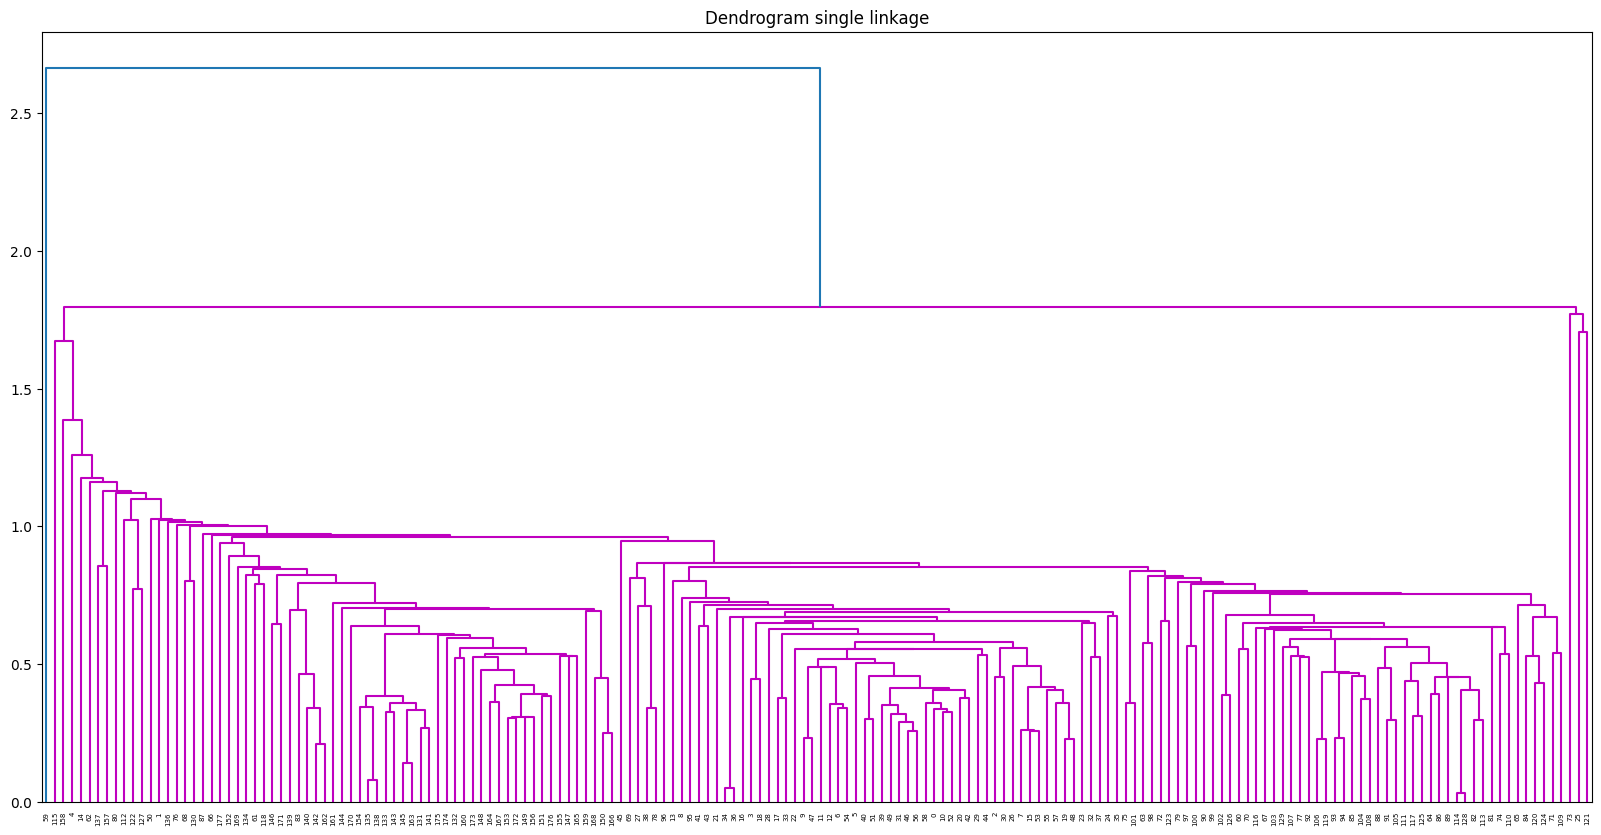

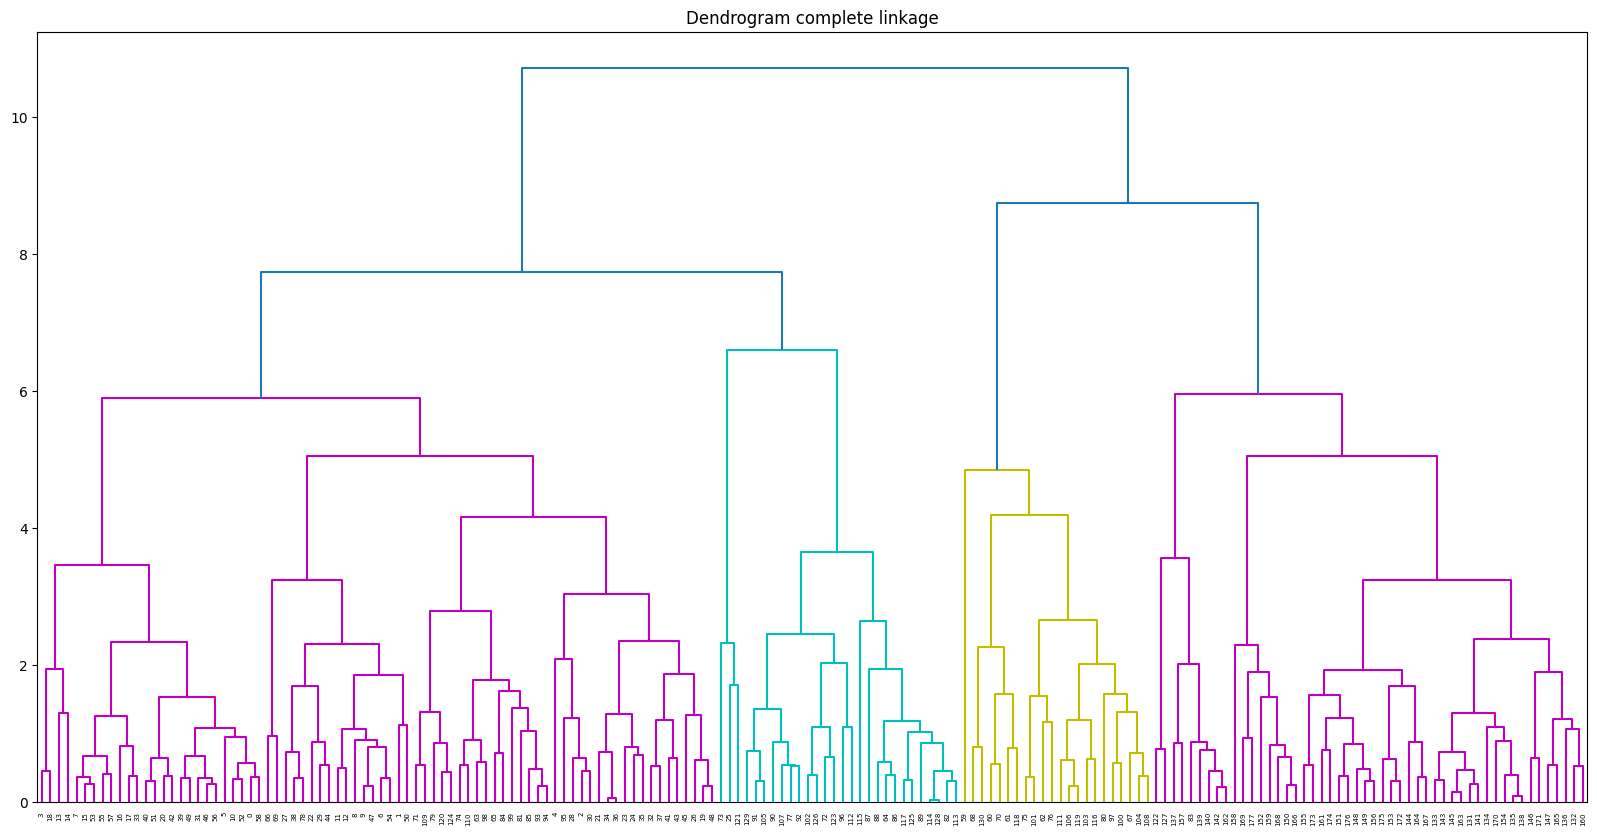

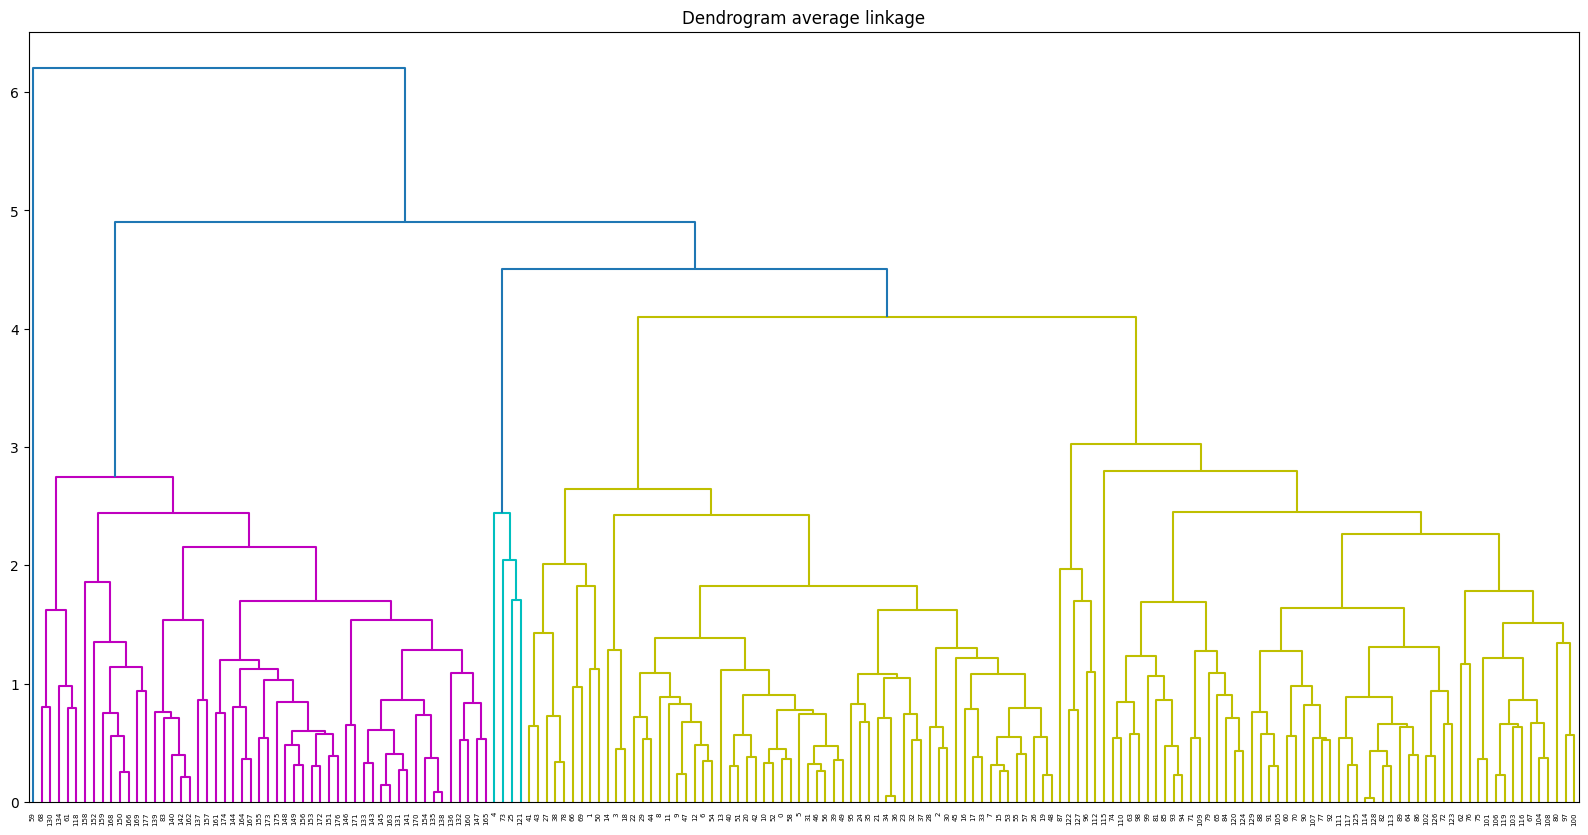

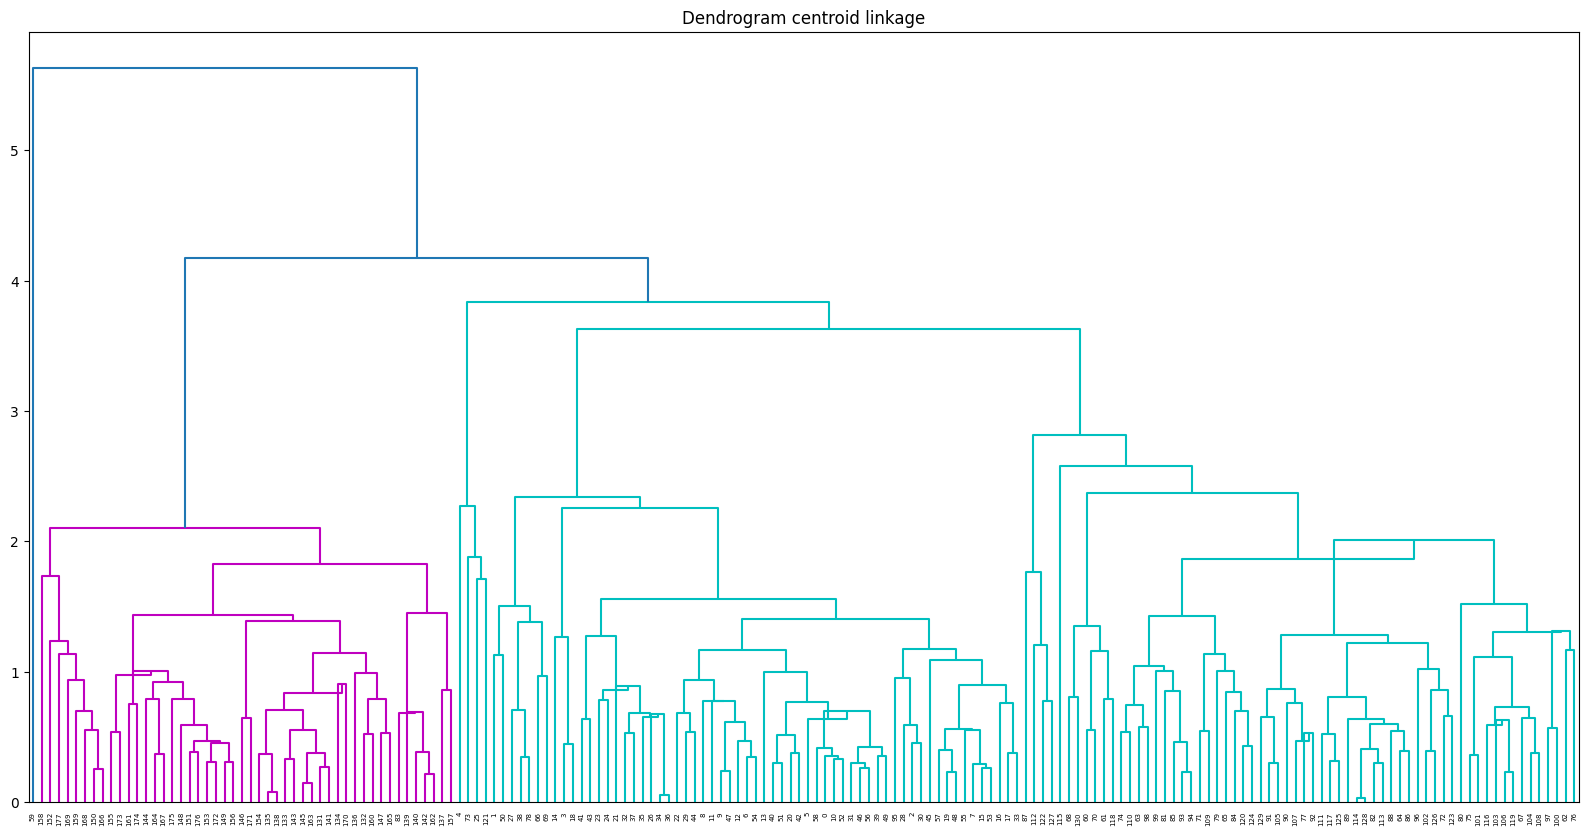

In [31]:
#checking dendrogram of different linkage types
method = ['single','complete','average','centroid']
sch.set_link_color_palette(['m','c','y'])
for i in method:
  plt.figure(figsize=(20,10))
  plt.title(f'Dendrogram {i} linkage')
  dendrogram = sch.dendrogram(sch.linkage(pca_vals,method=i))
  plt.show()
  print('\n')

In [32]:
# Since, complete linkage seems optimally distributed so we go with complete linkage with 3 clusters and fitting the model

hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [33]:
# here is the clusters using Hierarchical clustering
y_hc = hc.fit_predict(pca_vals)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
#creating cluster column for Hierarchical Clustering

fdf['hc_cluster'] = y_hc

##### KMeans

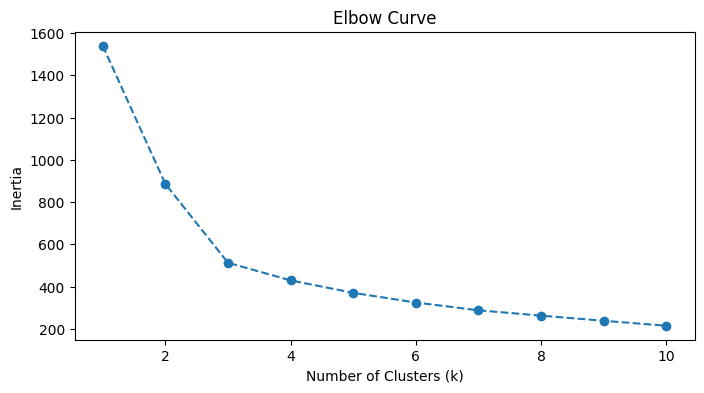

In [35]:
# Creating an empty list to store the inertia (within cluster sum of squared distances)
wcss = []

# Trying different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_vals)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

    As we can see Elbow point as 3, till which it has sharp downfall then there is slow downfall so we will pick 3 as the Elbow point.

In [36]:
# Here we are selecting 3 clusters

clusters = KMeans(n_clusters=3,random_state=0)
clusters.fit(pca_vals)

KMeans(n_clusters=3, random_state=0)

In [37]:
# labels/cluster we got from kmeans clustering
label = clusters.labels_
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [38]:
#creating cluster column for KMeans
fdf['km_cluster'] = label

In [39]:
# so here is the final dataframe of the clusters we get
fdf

,pc1,pc2,pc3,Type,hc_cluster,km_cluster
0,3.316751,-1.443463,-0.165739,1,0,2
1,2.209465,0.333393,-2.026457,1,0,2
2,2.516740,-1.031151,0.982819,1,0,2
3,3.757066,-2.756372,-0.176192,1,0,2
4,1.008908,-0.869831,2.026688,1,0,2
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1,0
174,-2.601956,-1.757229,0.207581,3,1,0
175,-2.677839,-2.760899,-0.940942,3,1,0
176,-2.387017,-2.297347,-0.550696,3,1,0
